In [110]:
import codecs
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/ATLAS/ATLAS/")
from utils import *
from scipy.interpolate import interp1d
%matplotlib inline

In [2]:
atlas_path = 'Gaia20fnr_red.txt'

data_o, data_c = read_atlas_csv(atlas_path)

gaia_path = 'Gaia20fnr.txt'

data_gaia = edit_gaia_file(gaia_path)

/Users/somayeh/Library/Mobile Documents/com~apple~CloudDocs/Research/ATLAS/ATLAS/utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['err_mag'] = get_gaia_errors(df_cleaned['averagemag'])


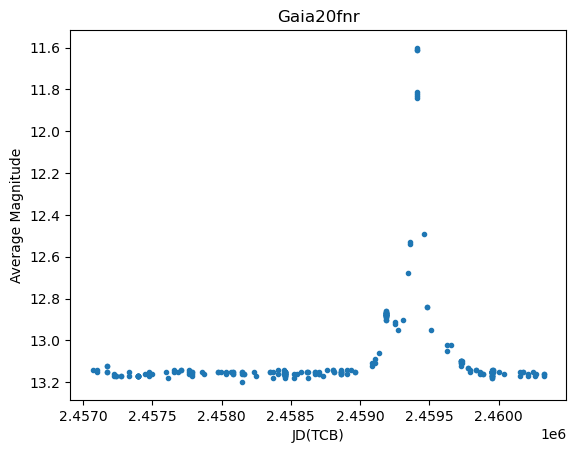

In [3]:
import matplotlib.pyplot as plt

plt.errorbar(data_gaia['JD(TCB)'], data_gaia['averagemag'],yerr=data_gaia['err_mag'],fmt='.')
plt.gca().invert_yaxis()


plt.xlabel('JD(TCB)')
plt.ylabel('Average Magnitude')
plt.title('Gaia20fnr')
plt.show()

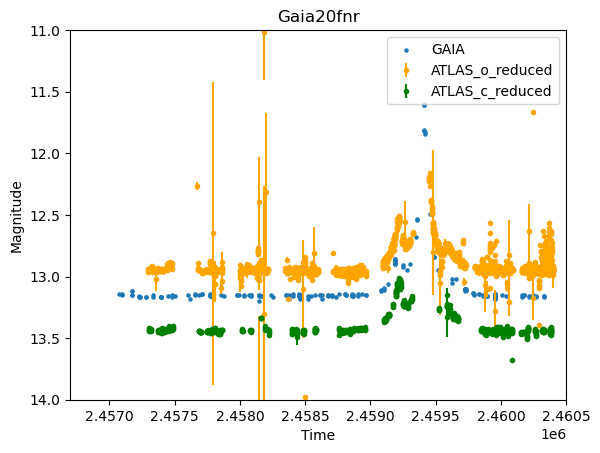

In [4]:
plt.scatter(data_gaia['JD(TCB)'], data_gaia['averagemag'],s=5 ,label='GAIA')
plt.errorbar(data_o['t'], data_o['m'],yerr=data_o['m_err'],fmt='.', color='orange',label='ATLAS_o_reduced')
plt.errorbar(data_c['t'],data_c['m'], yerr=data_c['m_err'] ,fmt='.', color='green',label='ATLAS_c_reduced')
plt.legend()
plt.gca().invert_yaxis()



plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Gaia20fnr')
plt.ylim(14,11)
plt.xlim(2456700,2460500)
plt.show()

In [5]:
data_o, data_c = clean_atlas(data_o, data_c)

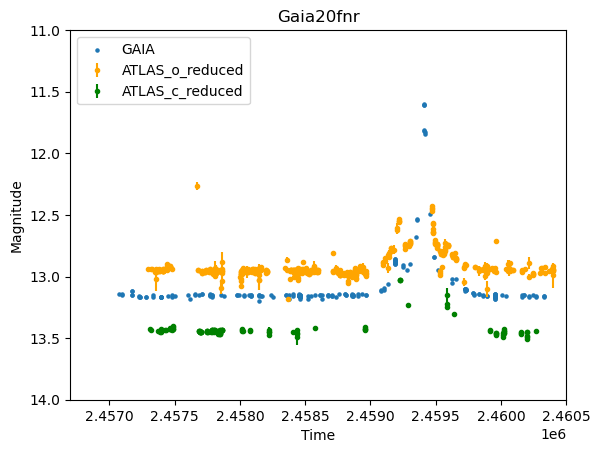

In [6]:
plt.scatter(data_gaia['JD(TCB)'], data_gaia['averagemag'],s=5 ,label='GAIA')
plt.errorbar(data_o['t'], data_o['m'],yerr=data_o['m_err'],fmt='.', color='orange',label='ATLAS_o_reduced')
plt.errorbar(data_c['t'],data_c['m'], yerr=data_c['m_err'] ,fmt='.', color='green',label='ATLAS_c_reduced')
plt.legend()
plt.gca().invert_yaxis()
plt.ylim(14,11)
plt.xlim(2456700,2460500)


plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Gaia20fnr')
plt.show()

In [7]:
data_o = data_o[['t', 'm' , 'm_err']]
data_c = data_c[['t', 'm' , 'm_err']]
data_gaia = data_gaia[['JD(TCB)',	'averagemag', 'err_mag']]

In [8]:
# data_o.to_csv("Gaia_ATLAS_o.txt", sep="\t", index=False, header=False)
# data_c.to_csv("Gaia_ATLAS_c.txt", sep="\t", index=False, header=False)
# df_cleaned.to_csv("Gaia.txt", sep="\t", index=False, header=False)

In [9]:
import os, sys

from pyLIMA import event
from pyLIMA import telescopes


your_event = event.Event()
your_event.name = 'Gaia20fnr'

In [10]:
## Load up the data
data_1 = data_o.values #np.loadtxt('Gaia_ATLAS_o.txt')
telescope_1 = telescopes.Telescope(name = 'ATLAS_o',
                                   camera_filter = 'R',
                                   light_curve = data_1.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])

data_2 = data_c.values #np.loadtxt('Gaia_ATLAS_c.txt')
telescope_2 = telescopes.Telescope(name = 'ATLAS_c',
                                   camera_filter = 'V',
                                   light_curve = data_2.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])

data_3 = data_gaia.values #np.loadtxt('Gaia.txt')
telescope_3 = telescopes.Telescope(name = 'Gaia',
                                   camera_filter = 'G',
                                   light_curve = data_3.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])


data_4 = np.loadtxt('ASASSN_V.txt')
telescope_4 = telescopes.Telescope(name = 'ASASSN_V',
                                   camera_filter = 'V',
                                   light_curve = data_4.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])



data_5 = np.loadtxt('ASASSN_g.txt')
telescope_5 = telescopes.Telescope(name = 'ASASSN_g',
                                   camera_filter = 'G',
                                   light_curve = data_5.astype(float),
                                   light_curve_names = ['time','mag','err_mag'],
                                   light_curve_units = ['JD','mag','mag'])


# data_6 = np.loadtxt('/content/drive/My Drive/Observing Microlensing with ATLAS/TESS_Data/TESS_sec33.txt')
# telescope_6 = telescopes.Telescope(name = 'TESS_sec33',
#                                    camera_filter = 'T',
#                                    light_curve = data_6.astype(float),
#                                    light_curve_names = ['time','mag','err_mag'],
#                                    light_curve_units = ['JD','mag','mag'])


# data_7 = np.loadtxt('/content/drive/My Drive/Observing Microlensing with ATLAS/TESS_Data/TESS_sec6.txt')
# telescope_7 = telescopes.Telescope(name = 'TESS_sec6',
#                                    camera_filter = 'T',
#                                    light_curve = data_7.astype(float),
#                                    light_curve_names = ['time','mag','err_mag'],
#                                    light_curve_units = ['JD','mag','mag'])

In [11]:
## Append these two telescope data sets to your EVENT object.
your_event.telescopes.append(telescope_1)
your_event.telescopes.append(telescope_2)
your_event.telescopes.append(telescope_3)
your_event.telescopes.append(telescope_4)
your_event.telescopes.append(telescope_5)
# your_event.telescopes.append(telescope_6)
# your_event.telescopes.append(telescope_7)

In [12]:
### Define the survey telescope that you want to use to align all other data sets to.
### We recommend using the data set with the most measurements covering the gretest
### time span of observations:
your_event.find_survey('Gaia')

In [85]:
from pyLIMA.models import PSBL_model, DSPL_model
psbl = PSBL_model.PSBLmodel(your_event, 
                            parallax=['Full', 2459403], 
                            xallarap=['None',0.0],
                            orbital_motion=['Circular', 2459403])

Parallax(Full) estimated for the telescope Gaia: SUCCESS
Parallax(Full) estimated for the telescope ATLAS_o: SUCCESS
Parallax(Full) estimated for the telescope ATLAS_c: SUCCESS
Parallax(Full) estimated for the telescope ASASSN_V: SUCCESS
Parallax(Full) estimated for the telescope ASASSN_g: SUCCESS


In [86]:
psbl.model_dictionnary

OrderedDict([('t0', 0),
             ('u0', 1),
             ('tE', 2),
             ('separation', 3),
             ('mass_ratio', 4),
             ('alpha', 5),
             ('piEN', 6),
             ('piEE', 7),
             ('v_para', 8),
             ('v_perp', 9),
             ('v_radial', 10),
             ('fsource_Gaia', 11),
             ('fblend_Gaia', 12),
             ('fsource_ATLAS_o', 13),
             ('fblend_ATLAS_o', 14),
             ('fsource_ATLAS_c', 15),
             ('fblend_ATLAS_c', 16),
             ('fsource_ASASSN_V', 17),
             ('fblend_ASASSN_V', 18),
             ('fsource_ASASSN_g', 19),
             ('fblend_ASASSN_g', 20)])

In [87]:
initial_parameters = [2459406.30627, 0.33647, 46.01927, 0.59084, 0.37058, 1.6186, -0.5577, 0.61278, 0.1334, 0.90296, 2.93143]

In [88]:
from pyLIMA.fits import MCMC_fit
my_fit5 = MCMC_fit.MCMCfit(psbl)
my_fit5.model_parameters_guess = initial_parameters
my_fit5.fit()

initial_guess  : Initial parameters guess SUCCESS
Using guess:  [2459406.30627, 0.33647, 46.01927, 0.59084, 0.37058, 1.6186, -0.5577, 0.61278, 0.1334, 0.90296, 2.93143]
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


100%|██████████████████████████████████████████████████████████████████| 5000/5000 [23:48<00:00,  3.50it/s]


fit  : Monte Carlo Markov Chain (Affine Invariant) fit SUCCESS
best_model: [ 2.45940027e+06  1.71530650e-01  4.57051755e+01  1.68646328e+00
  1.70287902e-01  3.04116040e+00  3.36056234e-01 -7.93126185e-01
  3.92648285e+00 -4.30000842e-01  3.28463852e+00  1.47620831e+06
 -9.78690207e+05  1.76836256e+06 -1.17022872e+06  1.23980102e+06
 -8.58460939e+05 -8.86285890e+06  9.26141876e+06  7.40511456e+05
 -4.84941784e+05] likelihood -89631.9222085462


In [89]:
# my_fit5.fit_results

In [90]:
MCMC_results = my_fit5.fit_results['MCMC_chains_with_fluxes']

In [124]:
MCMC_results.shape

(5000, 22, 22)

In [91]:
best_model_index = np.where(MCMC_results[:, :, -1] == MCMC_results[:, :, -1].max())

In [92]:
MCMC_results = my_fit5.fit_results['MCMC_chains']
print ('Parameters', '  Model','          Fit','     Errors')
print ('-----------------------------------')
print ('t_0:', '        2459406.30627 ',str(np.median(MCMC_results[4000:,:,0]))[:7],'',str(np.std(MCMC_results[4000:,:,0]))[:7])
print ('u_0:', '        0.33647       ',str(np.median(MCMC_results[4000:,:,1]))[:7],'',str(np.std(MCMC_results[4000:,:,1]))[:7])
print ('t_E:', '        46.01927      ',str(np.median(MCMC_results[4000:,:,2]))[:7],'',str(np.std(MCMC_results[4000:,:,2]))[:7])
print ('s:', '          0.59084       ',str(np.median(MCMC_results[4000:,:,3]))[:7],'',str(np.std(MCMC_results[4000:,:,3]))[:7])
print ('q:', '          0.37058       ',str(np.median(MCMC_results[4000:,:,4]))[:7],'',str(np.std(MCMC_results[4000:,:,4]))[:7])
print ('alpha:', '      1.6186        ',str(np.median(MCMC_results[4000:,:,5]))[:7],'',str(np.std(MCMC_results[4000:,:,5]))[:7])

Parameters   Model           Fit      Errors
-----------------------------------
t_0:         2459406.30627  2459401  2.11620
u_0:         0.33647        0.17175  0.13619
t_E:         46.01927       45.7500  0.12712
s:           0.59084        1.72885  0.39778
q:           0.37058        0.18986  0.06964
alpha:       1.6186         3.05873  0.12894


In [93]:
MCMC_results = my_fit5.fit_results['MCMC_chains_with_fluxes']
print ('Parameters', '  Model','          Fit','     Errors')
print ('-----------------------------------')
print ('t_0:', '        2459406.30627 ',str(np.median(MCMC_results[1000:,:,0]))[:7],'',str(np.std(MCMC_results[1000:,:,0]))[:7])
print ('u_0:', '        0.33647       ',str(np.median(MCMC_results[1000:,:,1]))[:7],'',str(np.std(MCMC_results[1000:,:,1]))[:7])
print ('t_E:', '        46.01927      ',str(np.median(MCMC_results[1000:,:,2]))[:7],'',str(np.std(MCMC_results[1000:,:,2]))[:7])
print ('s:', '          0.59084       ',str(np.median(MCMC_results[1000:,:,3]))[:7],'',str(np.std(MCMC_results[1000:,:,3]))[:7])
print ('q:', '          0.37058       ',str(np.median(MCMC_results[1000:,:,4]))[:7],'',str(np.std(MCMC_results[1000:,:,4]))[:7])
print ('alpha:', '      1.6186        ',str(np.median(MCMC_results[1000:,:,5]))[:7],'',str(np.std(MCMC_results[1000:,:,5]))[:7])
print ('piEN:', '      -0.5577        ',str(np.median(MCMC_results[1000:,:,6]))[:7],'',str(np.std(MCMC_results[1000:,:,6]))[:7])
print ('piEE:', '      0.61278       ',str(np.median(MCMC_results[1000:,:,7]))[:8],'',str(np.std(MCMC_results[1000:,:,7]))[:8])
print ('v_para:', '      0.1334        ',str(np.median(MCMC_results[1000:,:,8]))[:9],'',str(np.std(MCMC_results[1000:,:,8]))[:9])
print ('v_perp:', '      0.90296       ',str(np.median(MCMC_results[1000:,:,9]))[:10],'',str(np.std(MCMC_results[1000:,:,9]))[:10])
print ('v_radial:', '        2.93143      ',str(np.median(MCMC_results[1000:,:,10]))[:11],'',str(np.std(MCMC_results[1000:,:,10]))[:11])
print ('fsource_Gaia:', '     ----        ',str(np.median(MCMC_results[1000:,:,11]))[:12],'',str(np.std(MCMC_results[1000:,:,11]))[:12])

Parameters   Model           Fit      Errors
-----------------------------------
t_0:         2459406.30627  2459405  2.25780
u_0:         0.33647        0.21052  0.24315
t_E:         46.01927       45.7973  0.14813
s:           0.59084        1.85599  0.39951
q:           0.37058        0.22052  0.09616
alpha:       1.6186         3.05665  0.33686
piEN:       -0.5577         0.39884  0.04466
piEE:       0.61278        -0.79440  0.032891
v_para:       0.1334         3.6386616  1.6898304
v_perp:       0.90296        -0.4331755  0.53235286
v_radial:         2.93143       3.204301916  0.296212813
fsource_Gaia:      ----         1836389.4498  234384.09379



(['t0', 'u0', 'tE', 'separation', 'mass_ratio', 'alpha', 'fsource_Gaia', 'fblend_Gaia', 'fsource_ATLAS_o', 'fblend_ATLAS_o', 'fsource_ATLAS_c', 'fblend_ATLAS_c', 'fsource_ASASSN_V', 'fblend_ASASSN_V', 'fsource_ASASSN_g', 'fblend_ASASSN_g', 'fsource_TESS_sec33', 'fblend_TESS_sec33', 'fsource_TESS_sec6', 'fblend_TESS_sec6'])

In [95]:
my_fit5.fit_results['best_model']

array([ 2.45940027e+06,  1.71530650e-01,  4.57051755e+01,  1.68646328e+00,
        1.70287902e-01,  3.04116040e+00,  3.36056234e-01, -7.93126185e-01,
        3.92648285e+00, -4.30000842e-01,  3.28463852e+00,  1.47620831e+06,
       -9.78690207e+05,  1.76836256e+06, -1.17022872e+06,  1.23980102e+06,
       -8.58460939e+05, -8.86285890e+06,  9.26141876e+06,  7.40511456e+05,
       -4.84941784e+05])

In [96]:
my_fit5.fit_parameters.keys()

odict_keys(['t0', 'u0', 'tE', 'separation', 'mass_ratio', 'alpha', 'piEN', 'piEE', 'v_para', 'v_perp', 'v_radial'])

/Users/somayeh/opt/anaconda3/envs/pyt38/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 437 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/somayeh/opt/anaconda3/envs/pyt38/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 437 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/somayeh/opt/anaconda3/envs/pyt38/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 437 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Parallax(Full) estimated for the telescope Gaia: SUCCESS


(<Figure size 750x750 with 2 Axes>, GridBox(id='1002', ...))

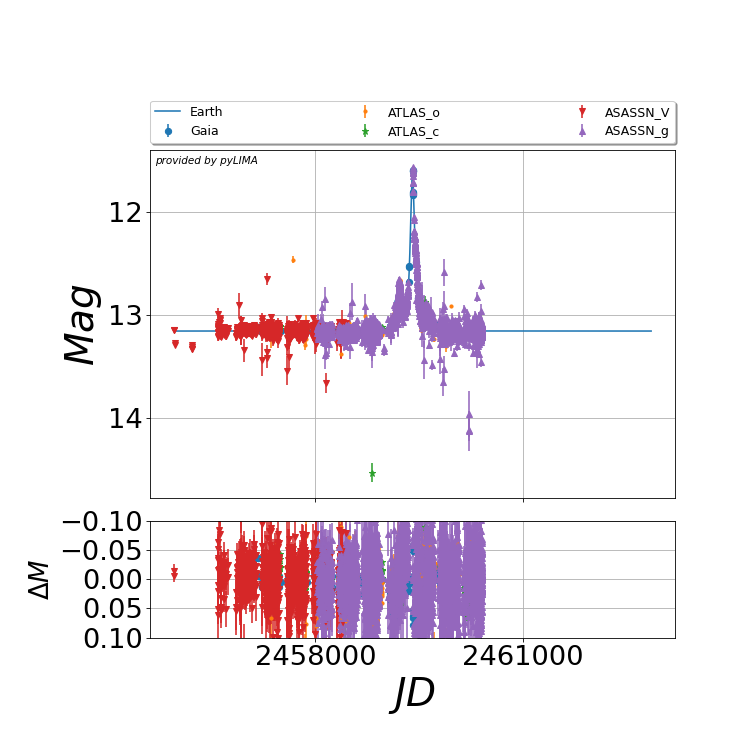

In [22]:
%matplotlib widget
from pyLIMA.outputs import pyLIMA_plots
# from google.colab import output
# output.enable_custom_widget_manager()

pyLIMA_plots.plot_lightcurves(psbl, my_fit5.fit_results['best_model'])

# plt.show()

# output.disable_custom_widget_manager()

In [97]:
pym = psbl.compute_pyLIMA_parameters(my_fit5.fit_results['best_model'])

In [98]:
photm_model = psbl.compute_the_microlensing_model(pyLIMA_plots.list_of_fake_telescopes[0], pym)['photometry']

In [99]:
mag_model = 27.4-2.5*np.log10(photm_model)

In [100]:
mjd_fake = pyLIMA_plots.list_of_fake_telescopes[0].lightcurve_magnitude['time'].value

In [101]:
base = np.median(mag_model)

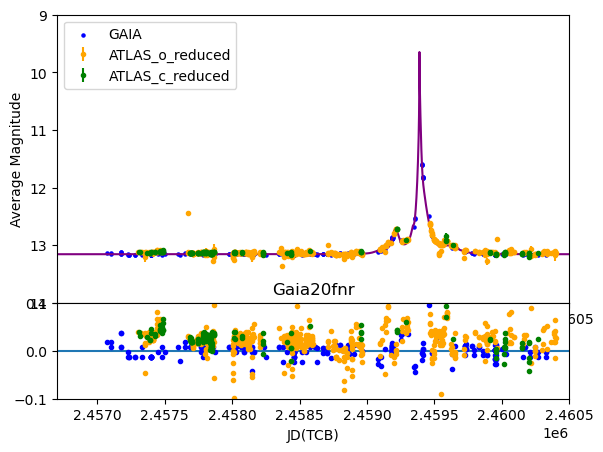

In [123]:
import matplotlib.pyplot as plt
plt.close()
fig1 = plt.figure(1)
frame1=fig1.add_axes((.1,.3,.8,.6))
plt.scatter(data_gaia['JD(TCB)'], data_gaia['averagemag'],s=5 ,color = 'blue', label='GAIA')
plt.errorbar(data_o['t'], data_o['m']-(np.median(data_o['m'])-base)+0.05,yerr=data_o['m_err'],fmt='.', color='orange',label='ATLAS_o_reduced')
plt.errorbar(data_c['t'],data_c['m']-(np.median(data_c['m'])-base)+0.05, yerr=data_c['m_err'] ,fmt='.', color='green',label='ATLAS_c_reduced')
plt.plot(mjd_fake, mag_model, color = 'purple')
plt.gca().invert_yaxis()
plt.ylabel('Average Magnitude')
plt.legend()
plt.ylim(14,9)
plt.xlim(2456700,2460500)

frame2=fig1.add_axes((.1,.1,.8,.2))
f = interp1d(mjd_fake, mag_model, assume_sorted = False)
xnew_gaia_res = f(data_gaia['JD(TCB)'])- data_gaia['averagemag']
plt.axhline(0)
plt.plot(data_gaia['JD(TCB)'], xnew_gaia_res,'.', color = 'blue')

xnew_atlas_o_res = f(data_o['t'])- (data_o['m']-(np.median(data_o['m'])-base)+0.05)
plt.plot(data_o['t'], xnew_atlas_o_res,'.', color = 'orange')

xnew_atlas_c_res = f(data_c['t'])- (data_c['m']-(np.median(data_c['m'])-base)+0.05)
plt.plot(data_c['t'], xnew_atlas_c_res,'.', color = 'green')




plt.xlabel('JD(TCB)')
plt.title('Gaia20fnr')
plt.gca().invert_yaxis()
plt.ylim(-0.1,0.1)

plt.xlim(2456700,2460500)
plt.show()